## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [2]:
import pandas as pd

myData = pd.read_csv(r"C:\Users\spink\OneDrive\Desktop\Machine Learning\Data\ha_1 (1).csv")
myData.head()

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease


In [3]:
myData.isna().sum()

Name         0
age          0
sex          0
cp           0
trtbps       0
chol         0
restecg      0
thalach      0
diagnosis    0
dtype: int64

In [4]:
myData.describe()

,age,sex,cp,trtbps,chol,restecg,thalach
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,53.813725,0.666667,2.049020,131.245098,248.377451,0.558824,149.147059
std,9.354781,0.472564,1.030352,18.352024,53.176624,0.526603,23.990925
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,71.000000
25%,46.000000,0.000000,1.000000,120.000000,212.750000,0.000000,132.000000
50%,54.000000,1.000000,2.000000,129.500000,241.000000,1.000000,153.500000
75%,61.000000,1.000000,3.000000,140.000000,276.250000,1.000000,166.250000
max,77.000000,1.000000,4.000000,200.000000,564.000000,2.000000,202.000000


In [5]:
myData.columns

Index(['Name', 'age', 'sex', 'cp', 'trtbps', 'chol', 'restecg', 'thalach',
       'diagnosis'],
      dtype='object')

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


X = myData[['age', 'chol']]
y = myData['diagnosis'].map({'No Disease': 0, 'Disease': 1})

log_reg_pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

log_reg_pipeline.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [7]:
log_reg_pipeline.named_steps['logisticregression'].coef_

array([[-0.42746115, -0.09597543]])

In [8]:
log_reg_pipeline.named_steps['logisticregression'].intercept_

array([0.27025982])

In [9]:
age = 55
scaler = log_reg_pipeline.named_steps['standardscaler']
lr_model = log_reg_pipeline.named_steps['logisticregression']

b0 = lr_model.intercept_[0]
beta_age = lr_model.coef_[0][0]
beta_chol = lr_model.coef_[0][1]

age_std = scaler.transform([[age, 0]])[0][0]

chol_std_50 = -(b0 + beta_age * age_std) / beta_chol

thresh_50_chol = scaler.inverse_transform([[age_std, chol_std_50]])[0][1]

prob_50 = log_reg_pipeline.predict_proba([[age, thresh_50_chol]])
prob_50[0][1]


C:\Users\spink\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\spink\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


np.float64(0.5)

In [10]:
import numpy as np

target_prob = 0.9
log_odds_target = np.log(target_prob / (1 - target_prob))

chol_std_90 = (log_odds_target - b0 - beta_age * age_std) / beta_chol

thresh_90_chol = scaler.inverse_transform([[age_std, chol_std_90]])[0][1]

prob_90 = log_reg_pipeline.predict_proba([[age, thresh_90_chol]])
prob_90[0][1]


C:\Users\spink\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


np.float64(0.8999999999999999)

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


X_lda = myData[['age', 'chol']]
y_lda = myData['diagnosis'].map({'No Disease': 0, 'Disease': 1})


lda_pipeline = make_pipeline(
    StandardScaler(),
    LinearDiscriminantAnalysis()
)

lda_pipeline.fit(X_lda, y_lda)

lda_scaler = lda_pipeline.named_steps['standardscaler']
lda_model = lda_pipeline.named_steps['lineardiscriminantanalysis']


In [12]:
import numpy as np

age = 55

lda_coefficients = lda_model.coef_[0]
lda_bias = lda_model.intercept_[0]

feature_means = lda_scaler.mean_
feature_stds = lda_scaler.scale_

age_in_std_space = (age - feature_means[0]) / feature_stds[0]

cholesterol_std_space = -(lda_bias + lda_coefficients[0] * age_in_std_space) / lda_coefficients[1]

cholesterol_threshold = feature_means[1] + cholesterol_std_space * feature_stds[1]

lda_disease_prob = lda_pipeline.predict_proba([[age, cholesterol_threshold]])
lda_disease_prob[0][1]


C:\Users\spink\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


np.float64(0.5)

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [13]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

X_svc = myData[['age', 'chol']]
y_svc = myData['diagnosis'].map({'No Disease': 0, 'Disease': 1})

svc_pipeline = make_pipeline(
    StandardScaler(),
    SVC(kernel='linear', probability=True)
)

param_grid = {
    'svc__C': [0.1, 1, 10, 100]
}

grid_search = GridSearchCV(svc_pipeline, param_grid, cv=5)
grid_search.fit(X_svc, y_svc)

svc_pipeline = grid_search.best_estimator_

svc_scaler = svc_pipeline.named_steps['standardscaler']
svc_model = svc_pipeline.named_steps['svc']


In [14]:
import numpy as np

age = 55

svc_coefficients = svc_model.coef_[0]
svc_intercept = svc_model.intercept_[0]

feature_means = svc_scaler.mean_
feature_stds = svc_scaler.scale_

age_standardized = (age - feature_means[0]) / feature_stds[0]

cholesterol_standardized = -(svc_intercept + svc_coefficients[0] * age_standardized) / svc_coefficients[1]

cholesterol_threshold = feature_means[1] + cholesterol_standardized * feature_stds[1]

svc_disease_prob = svc_pipeline.predict_proba([[age, cholesterol_threshold]])
svc_disease_prob[0][1]

C:\Users\spink\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


np.float64(0.5620464698905616)

## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

C:\Users\spink\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\spink\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\spink\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\spink\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\spink\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\spink\anaconda3\Lib\site-p

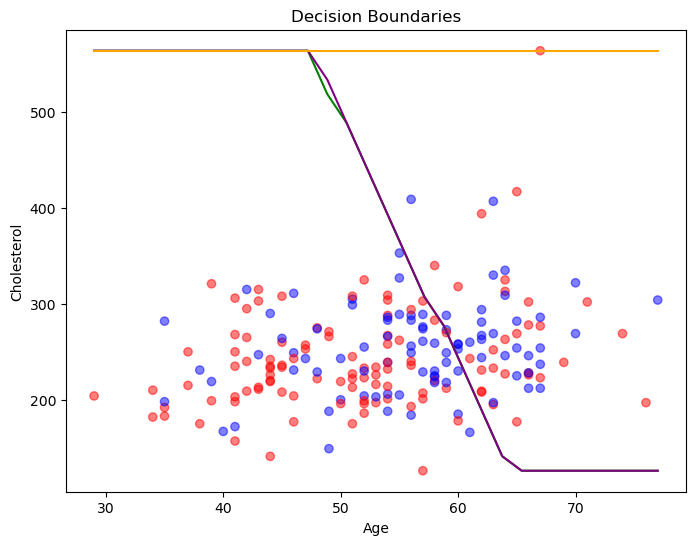

In [15]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 6))
plt.scatter(myData['age'], myData['chol'], c=['blue' if v==0 else 'red' for v in y], alpha=0.5)

age_range = np.linspace(myData['age'].min(), myData['age'].max(), 30)
chol_range = np.linspace(myData['chol'].min(), myData['chol'].max(), 30)

for model, color in [(log_reg_pipeline, 'green'), (lda_pipeline, 'purple'), (svc_pipeline, 'orange')]:
    boundary = [chol_range[np.argmin(np.abs(np.array([model.predict_proba([[a, c]])[0][1] for c in chol_range]) - 0.5))] for a in age_range]
    plt.plot(age_range, boundary, color=color, linewidth=1.5)

plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Decision Boundaries')
plt.show()
